In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
s = pd.Series(np.random.randn(5), index=["a", "b", "c", "d", "e"])

In [3]:
s

a    0.245885
b    0.471900
c   -1.020975
d    1.169638
e   -0.053373
dtype: float64

In [4]:
s["a"]
"e" in s

True

In [5]:
s.get("f", np.nan)

nan

In [6]:
s.iloc[1:] + s.iloc[:-1]

a         NaN
b    0.943800
c   -2.041950
d    2.339276
e         NaN
dtype: float64

In [7]:
s = pd.Series(np.random.randn(5), index=["a", "b", "c", "d", "e"], name="GDP")
s

a   -1.013558
b    0.006067
c    0.524789
d   -1.032013
e    0.402079
Name: GDP, dtype: float64

In [8]:
s = s.rename("Inflation")
s.name

'Inflation'

In [9]:
d = {
    "one": pd.Series([1.0, 2.0, 3.0], index=["a", "b", "c"]),
    "two": pd.Series([1.0, 2.0, 3.0, 4.0], index=["a", "b", "c", "d"]),
}
d

{'one': a    1.0
 b    2.0
 c    3.0
 dtype: float64,
 'two': a    1.0
 b    2.0
 c    3.0
 d    4.0
 dtype: float64}

In [10]:
df = pd.DataFrame(d)
df

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [11]:
pd.DataFrame(d, index=["d", "e", "c"])

,one,two
d,NaN,4.0
e,NaN,NaN
c,3.0,3.0


In [12]:
pd.DataFrame(d, index=["d", "e", "c"], columns=["two", "three"])

,two,three
d,4.0,NaN
e,NaN,NaN
c,3.0,NaN


In [13]:
df.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [14]:
df.columns

Index(['one', 'two'], dtype='object')

In [15]:
data = np.zeros((2,), dtype=[("A", "i4"), ("B", "f4"), ("C", "a10")])
data[:] = [(1, 2.0, "Hello"), (2, 3.0, "World")]
data

C:\Users\yluo\AppData\Local\Temp\ipykernel_13524\1279654678.py:1: DeprecationWarning: Data type alias 'a' was deprecated in NumPy 2.0. Use the 'S' alias instead.
  data = np.zeros((2,), dtype=[("A", "i4"), ("B", "f4"), ("C", "a10")])


array([(1, 2., b'Hello'), (2, 3., b'World')],
      dtype=[('A', '<i4'), ('B', '<f4'), ('C', 'S10')])

In [16]:
df2 = pd.DataFrame(data)
df2

,A,B,C
0,1,2.0,b'Hello'
1,2,3.0,b'World'


In [17]:
df2[["A", "C"]]

,A,C
0,1,b'Hello'
1,2,b'World'


In [18]:
# load iris data
iris = pd.read_csv("data/iris.data")
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [19]:
iris2 = iris.assign(sepal_ratio=iris["SepalWidth"] / iris["SepalLength"])
iris2.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,sepal_ratio
0,5.1,3.5,1.4,0.2,Iris-setosa,0.686275
1,4.9,3.0,1.4,0.2,Iris-setosa,0.612245
2,4.7,3.2,1.3,0.2,Iris-setosa,0.680851
3,4.6,3.1,1.5,0.2,Iris-setosa,0.673913
4,5.0,3.6,1.4,0.2,Iris-setosa,0.720000


In [20]:
# we can also pass along a lambda function
iris3 = iris.assign(sepal_ratio=lambda x: (x["SepalWidth"] / x["SepalLength"]))
iris3.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,sepal_ratio
0,5.1,3.5,1.4,0.2,Iris-setosa,0.686275
1,4.9,3.0,1.4,0.2,Iris-setosa,0.612245
2,4.7,3.2,1.3,0.2,Iris-setosa,0.680851
3,4.6,3.1,1.5,0.2,Iris-setosa,0.673913
4,5.0,3.6,1.4,0.2,Iris-setosa,0.720000


<Axes: >

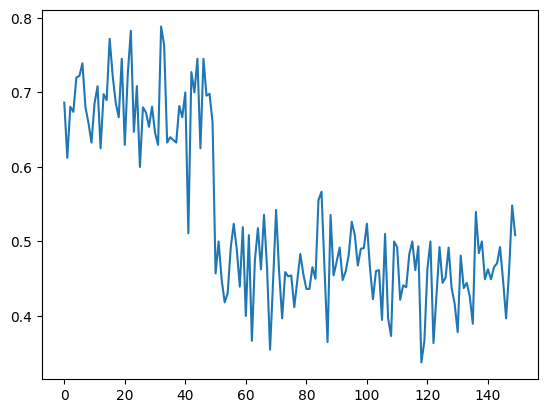

In [21]:
iris3["sepal_ratio"].plot()

<Axes: xlabel='SepalRatio', ylabel='PetalRatio'>

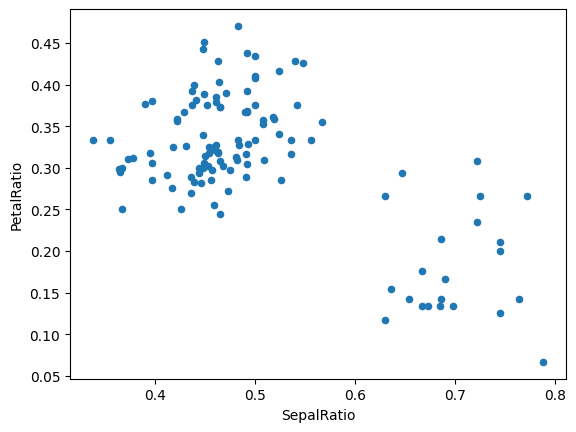

In [22]:
iris.query("SepalLength > 5").assign(
    SepalRatio = lambda x: x.SepalWidth / x.SepalLength,
    PetalRatio = lambda x: x.PetalWidth / x.PetalLength,
).plot(kind="scatter", x="SepalRatio", y="PetalRatio")

In [23]:
iris.to_string

<bound method DataFrame.to_string of      SepalLength  SepalWidth  PetalLength  PetalWidth            Name
0            5.1         3.5          1.4         0.2     Iris-setosa
1            4.9         3.0          1.4         0.2     Iris-setosa
2            4.7         3.2          1.3         0.2     Iris-setosa
3            4.6         3.1          1.5         0.2     Iris-setosa
4            5.0         3.6          1.4         0.2     Iris-setosa
..           ...         ...          ...         ...             ...
145          6.7         3.0          5.2         2.3  Iris-virginica
146          6.3         2.5          5.0         1.9  Iris-virginica
147          6.5         3.0          5.2         2.0  Iris-virginica
148          6.2         3.4          5.4         2.3  Iris-virginica
149          5.9         3.0          5.1         1.8  Iris-virginica

[150 rows x 5 columns]>

In [24]:
iris

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [25]:
# Create sample objects
index = pd.date_range("1/1/2000", periods=8)
s = pd.Series(np.random.randn(5), index=list("abcde"))
df = pd.DataFrame(np.random.randn(8, 3), index=index, columns=list("ABC"))

In [26]:
df.columns = [x.lower() for x in df.columns]
df

,a,b,c
2000-01-01,-1.260741,1.285155,-0.295565
2000-01-02,0.231402,1.239323,-0.400273
2000-01-03,0.601217,0.831495,-0.208075
2000-01-04,1.069782,1.061948,0.426132
2000-01-05,0.884932,0.947914,0.045564
2000-01-06,0.190457,0.298859,-0.337848
2000-01-07,1.165263,1.093582,0.863239
2000-01-08,0.529839,-0.477669,-1.425543


In [27]:
s.array

<NumpyExtensionArray>
[ 0.8011073815878966, -0.2397229667819829,  0.9339995851319991,
 -0.4157727650115321, -0.9522267123026894]
Length: 5, dtype: float64

In [28]:
df.to_numpy

<bound method DataFrame.to_numpy of                    a         b         c
2000-01-01 -1.260741  1.285155 -0.295565
2000-01-02  0.231402  1.239323 -0.400273
2000-01-03  0.601217  0.831495 -0.208075
2000-01-04  1.069782  1.061948  0.426132
2000-01-05  0.884932  0.947914  0.045564
2000-01-06  0.190457  0.298859 -0.337848
2000-01-07  1.165263  1.093582  0.863239
2000-01-08  0.529839 -0.477669 -1.425543>

In [43]:
df = pd.DataFrame(
    {
        "one": pd.Series(np.random.randn(3), index=["a", "b", "c"]),
        "two": pd.Series(np.random.randn(4), index=["a", "b", "c", "d"]),
        "three": pd.Series(np.random.randn(3), index=["b", "c", "d"]),
    }
)
df1 = df.copy()
df2 = df.copy()
df1.loc["a", "three"] = 100
df1.add(df2, fill_value=0)

,one,two,three
a,-1.126010,-1.394733,100.000000
b,2.416938,2.150964,0.767450
c,-3.199586,-1.982141,-1.315351
d,NaN,1.662678,0.748911


In [44]:
df

,one,two,three
a,-0.563005,-0.697366,NaN
b,1.208469,1.075482,0.383725
c,-1.599793,-0.991071,-0.657676
d,NaN,0.831339,0.374455


In [45]:
df > df2

,one,two,three
a,False,False,False
b,False,False,False
c,False,False,False
d,False,False,False


In [46]:
df2.gt(df2)

,one,two,three
a,False,False,False
b,False,False,False
c,False,False,False
d,False,False,False


In [49]:
(df>0).all(axis=1)

a    False
b     True
c    False
d    False
dtype: bool

In [50]:
df.empty

False

In [53]:
(df + df).equals(df * 2)

True

In [52]:
df

,one,two,three
a,-0.563005,-0.697366,NaN
b,1.208469,1.075482,0.383725
c,-1.599793,-0.991071,-0.657676
d,NaN,0.831339,0.374455


In [54]:
df1 = pd.DataFrame(
    {"A": [1.0, np.nan, 3.0, 5.0, np.nan], "B": [np.nan, 2.0, 3.0, np.nan, 6.0]}
)


df2 = pd.DataFrame(
    {
        "A": [5.0, 2.0, 4.0, np.nan, 3.0, 7.0],
        "B": [np.nan, np.nan, 3.0, 4.0, 6.0, 8.0],
    }
)
df1

,A,B
0,1.0,NaN
1,NaN,2.0
2,3.0,3.0
3,5.0,NaN
4,NaN,6.0


In [55]:
df2

,A,B
0,5.0,NaN
1,2.0,NaN
2,4.0,3.0
3,NaN,4.0
4,3.0,6.0
5,7.0,8.0


In [56]:
df1.combine_first(df2)

,A,B
0,1.0,NaN
1,2.0,2.0
2,3.0,3.0
3,5.0,4.0
4,3.0,6.0
5,7.0,8.0


In [57]:
def combiner(x, y):
    return np.where(pd.isna(x), y, x)

df1.combine(df2, combiner)

,A,B
0,1.0,NaN
1,2.0,2.0
2,3.0,3.0
3,5.0,4.0
4,3.0,6.0
5,7.0,8.0


In [58]:
import pandas as pd
import numpy as np

# Portfolio data from two different sources
portfolio_q1 = pd.DataFrame({
    'stock': ['AAPL', 'GOOGL', 'MSFT', 'TSLA'],
    'price': [150.0, np.nan, 250.0, 800.0],
    'volume': [1000, 1500, np.nan, 500],
    'rating': ['A', 'B+', np.nan, 'C']
})

portfolio_q2 = pd.DataFrame({
    'stock': ['AAPL', 'GOOGL', 'MSFT', 'AMZN'],  # TSLA dropped, AMZN added
    'price': [155.0, 2800.0, 245.0, 3200.0],
    'volume': [1200, 1800, 2000, 800],
    'rating': ['A+', 'A', 'B', 'A']
})

In [68]:
def smart_combiner(x, y):
    """
    Vectorized combiner using np.where
    """
    # Handle all NaN case
    both_nan = pd.isna(x) & pd.isna(y)  # Use & instead of 'and'
    x_nan = pd.isna(x) & ~pd.isna(y)
    y_nan = pd.isna(y) & ~pd.isna(x)
    both_exist = ~pd.isna(x) & ~pd.isna(y)
    
    # Apply logic vectorized
    return np.where(both_nan, np.nan,
           np.where(x_nan, y,
           np.where(y_nan, x,
           np.maximum(x, y))))  # Take max when both exist

# Apply the combiner
result = portfolio_q1[["stock", "price", "volume"]].combine(portfolio_q2[["stock", "price", "volume"]], smart_combiner)
result

,stock,price,volume
0,AAPL,155.0,1200.0
1,GOOGL,2800.0,1800.0
2,MSFT,250.0,2000.0
3,TSLA,3200.0,800.0


In [ ]:
result2 = portfolio_q1[["price", "volume"]].combine(
    portfolio_q2[["price"]],
    lambda s1, s2: pd.Series(np.fmax(s1, s2), index=s1.index)
)
result2

,price,volume
0,155.0,1000.0
1,2800.0,1500.0
2,250.0,NaN
3,3200.0,500.0


In [72]:
df

,one,two,three
a,-0.563005,-0.697366,NaN
b,1.208469,1.075482,0.383725
c,-1.599793,-0.991071,-0.657676
d,NaN,0.831339,0.374455


In [73]:
df_std = (df - df.mean(0)) / df.std()
df_std

,one,two,three
a,-0.172454,-0.716490,NaN
b,1.075012,0.972728,0.585076
c,-0.902557,-0.996339,-1.154666
d,NaN,0.740102,0.569590


In [76]:
s = pd.Series(np.random.randint(0, 7, size=50))
s.value_counts()

2    11
3    10
5    10
4     6
0     6
1     4
6     3
Name: count, dtype: int64

In [88]:
s = pd.Series(np.random.randn(20))
count = pd.cut(s, 5).value_counts()
print(count)

(-0.0748, 0.566]     6
(-0.715, -0.0748]    5
(-1.359, -0.715]     3
(0.566, 1.206]       3
(1.206, 1.847]       3
Name: count, dtype: int64


In [92]:
quntiles = pd.qcut(s, 5).value_counts()
quntiles

(-1.357, -0.559]    4
(-0.559, -0.111]    4
(-0.111, 0.292]     4
(0.292, 0.942]      4
(0.942, 1.847]      4
Name: count, dtype: int64

In [93]:
customers = pd.DataFrame({
    'customer_id': [1, 2, 3, 4, 5, 6],
    'age': [25, 45, 35, 22, 55, 30],
    'income': [45000, 75000, 62000, 38000, 95000, 51000],
    'purchase_amount': [120, 450, 280, 95, 680, 200],
    'email': ['john@email.com', 'JANE@EMAIL.COM', 'bob@email.com', 
              'alice@EMAIL.COM', 'charlie@email.com', 'diana@EMAIL.COM']
})
customers

,customer_id,age,income,purchase_amount,email
0,1,25,45000,120,john@email.com
1,2,45,75000,450,JANE@EMAIL.COM
2,3,35,62000,280,bob@email.com
3,4,22,38000,95,alice@EMAIL.COM
4,5,55,95000,680,charlie@email.com
5,6,30,51000,200,diana@EMAIL.COM


In [106]:
def standardize_email(df):
    """Convert all emails to lowercase"""
    df_copy = df.copy()
    df_copy["email"] = df_copy["email"].str.lower()
    return df_copy


def add_customer_segment(df):
    """Add customer segments based on income and age"""
    df_copy = df.copy()
    df_copy["age_group"] = pd.cut(
        df_copy["age"], bins=[0, 30, 50, 100], labels=["Young", "Middle", "Senior"])
    df_copy['income_tier'] = pd.cut(df_copy['income'], 
                                    bins=[0, 50000, 80000, float('inf')], 
                                    labels=['Low', 'Medium', 'High'])
    return df_copy

def calculate_metrics(df):
    df_copy = df.copy()
    df_copy["purchase_per_income"] = df_copy["purchase_amount"] / df_copy["income"]
    df_copy['high_value'] = df_copy['purchase_amount'] > df_copy['purchase_amount'].median()
    return df_copy

processed_customers = (
    customers
    .pipe(standardize_email)
    .pipe(add_customer_segment)
    .pipe(calculate_metrics)
)

processed_customers = processed_customers.drop(["age", "income", "purchase_amount"], axis=1)
processed_customers

,customer_id,email,age_group,income_tier,purchase_per_income,high_value
0,1,john@email.com,Young,Low,0.002667,False
1,2,jane@email.com,Middle,Medium,0.006000,True
2,3,bob@email.com,Middle,Medium,0.004516,True
3,4,alice@email.com,Young,Low,0.002500,False
4,5,charlie@email.com,Senior,High,0.007158,True
5,6,diana@email.com,Young,Medium,0.003922,False


In [108]:
# import statsmodels
import statsmodels.formula.api as sm

In [111]:
# load baseball data
baseball = pd.read_csv("data/baseball.csv", index_col="id")

# fit a regression model
(
    baseball.query("h > 0")
    .assign(ln_h=lambda df: np.log(df.h))
    .pipe((sm.ols, "data"), "hr ~ ln_h + year + g + C(lg)")
    .fit()
    .summary()
)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     hr   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     34.28
Date:                Wed, 24 Sep 2025   Prob (F-statistic):           3.48e-15
Time:                        21:51:15   Log-Likelihood:                -205.92
No. Observations:                  68   AIC:                             421.8
Df Residuals:                      63   BIC:                             432.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -8484.7720   4664.146     -1.819      0.074   -1.78e+04     835.780
C(lg)[T.NL]    -2.2736      1.325     -1.716      0.091      -4.922       0.375
ln_h           -1.3542      0.875     -1.547      0.127      -3.103       0.395
year            4.2277      2.324      1.819      0.074      -0.417       8.872
g               0.1841      0.029      6.258      0.000       0.125       0.243
==============================================================================
Omnibus:                       10.875   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               17.298
Skew:                           0.537   Prob(JB):                     0.000175
Kurtosis:                       5.225   Cond. No.                     1.49e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [112]:
df

,one,two,three
a,-0.563005,-0.697366,NaN
b,1.208469,1.075482,0.383725
c,-1.599793,-0.991071,-0.657676
d,NaN,0.831339,0.374455


In [113]:
df.mean()

one     -0.318110
two      0.054596
three    0.033501
dtype: float64

In [119]:
df.apply(lambda x: x.max() - x.min(), axis=0)

one      2.808262
two      2.066553
three    1.041400
dtype: float64

In [120]:
df.max(0) - df.min(0)

one      2.808262
two      2.066553
three    1.041400
dtype: float64

In [117]:
df.agg(['min', 'max']).diff().iloc[1]

one      2.808262
two      2.066553
three    1.041400
Name: max, dtype: float64

In [118]:
df.agg(lambda x: x.max() - x.min())

one      2.808262
two      2.066553
three    1.041400
dtype: float64

In [121]:
tsdf = pd.DataFrame(
    np.random.randn(1000, 3),
    columns=["A", "B", "C"],
    index=pd.date_range("1/1/2000", periods=1000),
)
tsdf

,A,B,C
2000-01-01,0.633190,1.147015,-0.842614
2000-01-02,0.499474,0.743566,-1.311359
2000-01-03,0.136825,1.013284,-1.116945
2000-01-04,1.508508,-1.028906,0.440537
2000-01-05,0.431473,0.696373,1.173997
...,...,...,...
2002-09-22,-1.259971,1.350057,-1.247810
2002-09-23,0.338664,0.168216,0.387804
2002-09-24,2.326011,-1.571197,1.310858
2002-09-25,1.412808,0.656858,0.831660


In [122]:
tsdf.apply(lambda x: x.idxmax())

A   2002-06-18
B   2000-05-24
C   2000-07-03
dtype: datetime64[ns]

In [123]:
tsdf.idxmax(0)

A   2002-06-18
B   2000-05-24
C   2000-07-03
dtype: datetime64[ns]

In [124]:
df_udf = pd.DataFrame(np.ones((2, 2)))
df_udf

,0,1
0,1.0,1.0
1,1.0,1.0


In [130]:
tsdf = pd.DataFrame(
    np.random.randn(10, 3),
    columns=["A", "B", "C"],
    index=pd.date_range("1/1/2000", periods=10),
)
tsdf.iloc[3:7] = np.nan
tsdf.interpolate()
# tsdf.apply(pd.Series.interpolate)

,A,B,C
2000-01-01,1.336960,1.574272,1.479781
2000-01-02,-1.520253,-0.008169,-1.087702
2000-01-03,0.510894,0.759183,0.682781
2000-01-04,0.316564,0.534703,0.648142
2000-01-05,0.122235,0.310224,0.613503
2000-01-06,-0.072095,0.085745,0.578864
2000-01-07,-0.266424,-0.138735,0.544224
2000-01-08,-0.460754,-0.363214,0.509585
2000-01-09,0.092737,-0.980588,-0.254749
2000-01-10,-0.706191,0.641566,0.269556


In [132]:
tsdf.sum(0)

A   -0.746607
B    1.623049
C    1.599253
dtype: float64

In [134]:
tsdf.agg(['mean', 'median', 'std'])

,A,B,C
mean,-0.124434,0.270508,0.266542
median,-0.184008,0.316698,0.389571
std,0.998633,0.907832,0.872927


In [135]:
tsdf

,A,B,C
2000-01-01,1.336960,1.574272,1.479781
2000-01-02,-1.520253,-0.008169,-1.087702
2000-01-03,0.510894,0.759183,0.682781
2000-01-04,NaN,NaN,NaN
2000-01-05,NaN,NaN,NaN
2000-01-06,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN
2000-01-08,-0.460754,-0.363214,0.509585
2000-01-09,0.092737,-0.980588,-0.254749
2000-01-10,-0.706191,0.641566,0.269556


In [136]:
# single stat
tsdf.mean()

A   -0.124434
B    0.270508
C    0.266542
dtype: float64

In [137]:
tsdf.agg({"A": "mean", "B": "median"})

A   -0.124434
B    0.316698
dtype: float64

In [138]:
tsdf.abs()

,A,B,C
2000-01-01,1.336960,1.574272,1.479781
2000-01-02,1.520253,0.008169,1.087702
2000-01-03,0.510894,0.759183,0.682781
2000-01-04,NaN,NaN,NaN
2000-01-05,NaN,NaN,NaN
2000-01-06,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN
2000-01-08,0.460754,0.363214,0.509585
2000-01-09,0.092737,0.980588,0.254749
2000-01-10,0.706191,0.641566,0.269556


In [139]:
tsdf.transform([np.abs, lambda x: (x+1)/2])

A                   B                   C          
            absolute  <lambda>  absolute  <lambda>  absolute  <lambda>
2000-01-01  1.336960  1.168480  1.574272  1.287136  1.479781  1.239891
2000-01-02  1.520253 -0.260127  0.008169  0.495916  1.087702 -0.043851
2000-01-03  0.510894  0.755447  0.759183  0.879591  0.682781  0.841391
2000-01-04       NaN       NaN       NaN       NaN       NaN       NaN
2000-01-05       NaN       NaN       NaN       NaN       NaN       NaN
2000-01-06       NaN       NaN       NaN       NaN       NaN       NaN
2000-01-07       NaN       NaN       NaN       NaN       NaN       NaN
2000-01-08  0.460754  0.269623  0.363214  0.318393  0.509585  0.754793
2000-01-09  0.092737  0.546368  0.980588  0.009706  0.254749  0.372626
2000-01-10  0.706191  0.146905  0.641566  0.820783  0.269556  0.634778

In [144]:
tsdf.transform({"A": np.abs, "B": [np.exp, lambda x: x+1]})

A         B          
            absolute       exp  <lambda>
2000-01-01  1.336960  4.827225  2.574272
2000-01-02  1.520253  0.991865  0.991831
2000-01-03  0.510894  2.136530  1.759183
2000-01-04       NaN       NaN       NaN
2000-01-05       NaN       NaN       NaN
2000-01-06       NaN       NaN       NaN
2000-01-07       NaN       NaN       NaN
2000-01-08  0.460754  0.695437  0.636786
2000-01-09  0.092737  0.375090  0.019412
2000-01-10  0.706191  1.899452  1.641566

In [148]:
# A practical use case of map()
# Grade conversion - complex mapping that replace() can't handle easily
grade_mapping = {
    'A+': 4.0, 'A': 4.0, 'A-': 3.7,
    'B+': 3.3, 'B': 3.0, 'B-': 2.7,
    'C+': 2.3, 'C': 2.0, 'C-': 1.7,
    'D': 1.0, 'F': 0.0
}

# Default to 0.0 for invalid grades
def convert_grade(grade):
    return grade_mapping.get(grade, 0.0)

df_students = pd.DataFrame({
    'student': ['Alice', 'Bob', 'Charlie', 'John'],
    'grade': ['A-', 'B+', 'X', 'C']  # Note: 'X' is invalid
})

df_students['gpd'] = df_students['grade'].map(convert_grade)

df_students


,student,grade,gpd
0,Alice,A-,3.7
1,Bob,B+,3.3
2,Charlie,X,0.0
3,John,C,2.0


In [149]:
s = pd.Series(np.random.randn(5), index=["a", "b", "c", "d", "e"])
s

a   -0.457298
b    1.301939
c   -0.137099
d   -0.208871
e    0.429614
dtype: float64

In [150]:
s.reindex(['b', 'c', 'a'])

b    1.301939
c   -0.137099
a   -0.457298
dtype: float64

In [151]:
df

,one,two,three
a,-0.563005,-0.697366,NaN
b,1.208469,1.075482,0.383725
c,-1.599793,-0.991071,-0.657676
d,NaN,0.831339,0.374455


In [152]:
df.reindex(index=['b', 'c', 'a'], columns=['three', 'one'])

,three,one
b,0.383725,1.208469
c,-0.657676,-1.599793
a,NaN,-0.563005


In [153]:
df2 = df.reindex(["a", "b", "c"], columns=["one", "two"])
df2

,one,two
a,-0.563005,-0.697366
b,1.208469,1.075482
c,-1.599793,-0.991071


In [154]:
df.reindex_like(df2)

,one,two
a,-0.563005,-0.697366
b,1.208469,1.075482
c,-1.599793,-0.991071


In [155]:
s = pd.Series(np.random.randn(5), index=["a", "b", "c", "d", "e"])
s1 = s[:4]
s2 = s[1:]
s

a   -0.262695
b   -1.243857
c    1.853900
d    0.912143
e    0.201684
dtype: float64

In [156]:
s1

a   -0.262695
b   -1.243857
c    1.853900
d    0.912143
dtype: float64

In [157]:
s2

b   -1.243857
c    1.853900
d    0.912143
e    0.201684
dtype: float64

In [162]:
s5 = s1.align(s2)
pd.DataFrame(s5).T

,0,1
a,-0.262695,NaN
b,-1.243857,-1.243857
c,1.853900,1.853900
d,0.912143,0.912143
e,NaN,0.201684


In [163]:
df

,one,two,three
a,-0.563005,-0.697366,NaN
b,1.208469,1.075482,0.383725
c,-1.599793,-0.991071,-0.657676
d,NaN,0.831339,0.374455


In [164]:
df2

,one,two
a,-0.563005,-0.697366
b,1.208469,1.075482
c,-1.599793,-0.991071


In [165]:
df.align(df2, join="inner")

(        one       two
 a -0.563005 -0.697366
 b  1.208469  1.075482
 c -1.599793 -0.991071,
         one       two
 a -0.563005 -0.697366
 b  1.208469  1.075482
 c -1.599793 -0.991071)

In [168]:
weights = pd.Series({'AAPL': 0.5, 'MSFT': 0.3, 'NVDA': 0.2})
returns = pd.Series({'AAPL': 0.01, 'MSFT': -0.02, 'GOOGL': 0.03})
w, r = weights.align(returns, join='outer', fill_value=0)
port_return = (w * r).sum()
port_return

np.float64(-0.001)

In [169]:
prices_source1 = pd.Series([100, 105, 110], 
                          index=['2023-01-01', '2023-01-02', '2023-01-03'],
                          name='AAPL')
prices_source2 = pd.Series([102, 108, 115, 120], 
                          index=['2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05'],
                          name='AAPL')
prices_source1

2023-01-01    100
2023-01-02    105
2023-01-03    110
Name: AAPL, dtype: int64

In [170]:
prices_source2

2023-01-02    102
2023-01-03    108
2023-01-04    115
2023-01-05    120
Name: AAPL, dtype: int64

In [171]:
prices_source1 + prices_source2

2023-01-01      NaN
2023-01-02    207.0
2023-01-03    218.0
2023-01-04      NaN
2023-01-05      NaN
Name: AAPL, dtype: float64

In [172]:
rng = pd.date_range("1/3/2000", periods=8)
ts = pd.Series(np.random.randn(8), index=rng)
ts2 = ts.iloc[[2, 5, 1]]

In [173]:
ts

2000-01-03    0.940217
2000-01-04    1.019080
2000-01-05    0.273841
2000-01-06    1.855488
2000-01-07   -2.095734
2000-01-08    0.250402
2000-01-09    1.707419
2000-01-10   -0.858805
Freq: D, dtype: float64

In [174]:
ts2

2000-01-05    0.273841
2000-01-08    0.250402
2000-01-04    1.019080
dtype: float64

In [177]:
ts2 = ts2.sort_index()
ts2

2000-01-04    1.019080
2000-01-05    0.273841
2000-01-08    0.250402
dtype: float64

In [179]:
ts2.reindex(ts.index)

2000-01-03         NaN
2000-01-04    1.019080
2000-01-05    0.273841
2000-01-06         NaN
2000-01-07         NaN
2000-01-08    0.250402
2000-01-09         NaN
2000-01-10         NaN
Freq: D, dtype: float64

In [180]:
ts2.reindex(ts.index, method="ffill")

2000-01-03         NaN
2000-01-04    1.019080
2000-01-05    0.273841
2000-01-06    0.273841
2000-01-07    0.273841
2000-01-08    0.250402
2000-01-09    0.250402
2000-01-10    0.250402
Freq: D, dtype: float64

In [181]:
ts2.reindex(ts.index, method="ffill", limit=1)

2000-01-03         NaN
2000-01-04    1.019080
2000-01-05    0.273841
2000-01-06    0.273841
2000-01-07         NaN
2000-01-08    0.250402
2000-01-09    0.250402
2000-01-10         NaN
Freq: D, dtype: float64

In [182]:
df

,one,two,three
a,-0.563005,-0.697366,NaN
b,1.208469,1.075482,0.383725
c,-1.599793,-0.991071,-0.657676
d,NaN,0.831339,0.374455


In [183]:
df.drop(["a", "c"], axis=0)

,one,two,three
b,1.208469,1.075482,0.383725
d,NaN,0.831339,0.374455


In [184]:
df.drop(["one", "three"], axis=1)

,two
a,-0.697366
b,1.075482
c,-0.991071
d,0.831339


In [185]:
s

a   -0.262695
b   -1.243857
c    1.853900
d    0.912143
e    0.201684
dtype: float64

In [186]:
s.rename(str.upper)

A   -0.262695
B   -1.243857
C    1.853900
D    0.912143
E    0.201684
dtype: float64

In [187]:
df.rename(
    columns={"one": "GDP", "two": "Inflation", "three": "Unemployment"}
)

,GDP,Inflation,Unemployment
a,-0.563005,-0.697366,NaN
b,1.208469,1.075482,0.383725
c,-1.599793,-0.991071,-0.657676
d,NaN,0.831339,0.374455


In [190]:
s.name = "GNP"

In [191]:
s

a   -0.262695
b   -1.243857
c    1.853900
d    0.912143
e    0.201684
Name: GNP, dtype: float64

In [198]:
df.rename(columns={"one": "GDP"})

,GDP,two,three
a,-0.563005,-0.697366,NaN
b,1.208469,1.075482,0.383725
c,-1.599793,-0.991071,-0.657676
d,NaN,0.831339,0.374455


In [199]:
df.rename(index=str.upper)

,one,two,three
A,-0.563005,-0.697366,NaN
B,1.208469,1.075482,0.383725
C,-1.599793,-0.991071,-0.657676
D,NaN,0.831339,0.374455


In [200]:
df5 = pd.DataFrame(
    {"x": [1, 2, 3, 4, 5, 6], "y": [10, 20, 30, 40, 50, 60]},
    index=pd.MultiIndex.from_product(
        [["a", "b", "c"], [1, 2]], names=["let", "num"]
    ),
)

In [210]:
df5.columns.name = "Stat"

In [211]:
df5

Stat     x   y
let num       
a   1    1  10
    2    2  20
b   1    3  30
    2    4  40
c   1    5  50
    2    6  60

In [205]:
df5.rename_axis(index={"let": "Category"})

x   y
Category num       
a        1    1  10
         2    2  20
b        1    3  30
         2    4  40
c        1    5  50
         2    6  60

In [207]:
df5.rename(columns={"x": "GDP"})

GDP   y
let num         
a   1      1  10
    2      2  20
b   1      3  30
    2      4  40
c   1      5  50
    2      6  60

In [208]:
df5.columns.name = "Stat"

In [209]:
df5

Stat     x   y
let num       
a   1    1  10
    2    2  20
b   1    3  30
    2    4  40
c   1    5  50
    2    6  60

In [213]:
df5.rename_axis(index={"let": "Category"},
               columns={"Stat": "Statistics"})

Statistics    x   y
Category num       
a        1    1  10
         2    2  20
b        1    3  30
         2    4  40
c        1    5  50
         2    6  60

In [214]:
for col in df5:
    print(col)

x
y


In [215]:
for index, row in df5.iterrows():
    print(index, row, sep="\n")

('a', 1)
Stat
x     1
y    10
Name: (a, 1), dtype: int64
('a', 2)
Stat
x     2
y    20
Name: (a, 2), dtype: int64
('b', 1)
Stat
x     3
y    30
Name: (b, 1), dtype: int64
('b', 2)
Stat
x     4
y    40
Name: (b, 2), dtype: int64
('c', 1)
Stat
x     5
y    50
Name: (c, 1), dtype: int64
('c', 2)
Stat
x     6
y    60
Name: (c, 2), dtype: int64


In [216]:
for row in df5.itertuples():
    print(row)

Pandas(Index=('a', 1), x=1, y=10)
Pandas(Index=('a', 2), x=2, y=20)
Pandas(Index=('b', 1), x=3, y=30)
Pandas(Index=('b', 2), x=4, y=40)
Pandas(Index=('c', 1), x=5, y=50)
Pandas(Index=('c', 2), x=6, y=60)


In [222]:
index = pd.date_range("20100101", periods=5, freq="MS")
df6 = pd.DataFrame(np.random.randn(5,3), index=index, columns=list("ABC"))
df6

,A,B,C
2010-01-01,-0.776831,0.231553,-2.125108
2010-02-01,0.558351,0.265654,1.625483
2010-03-01,-0.311558,2.556527,-0.398348
2010-04-01,-0.034046,-0.299036,0.960251
2010-05-01,-0.488930,0.796014,0.658169


In [228]:
df6['date'] = df6.index

In [230]:
df6["date"].dt.month

2010-01-01    1
2010-02-01    2
2010-03-01    3
2010-04-01    4
2010-05-01    5
Freq: MS, Name: date, dtype: int32

In [231]:
df6[df6["date"].dt.month == 2]

,A,B,C,date
2010-02-01,0.558351,0.265654,1.625483,2010-02-01


In [232]:
df6["date"].dt.strftime("%Y/%m%d")

2010-01-01    2010/0101
2010-02-01    2010/0201
2010-03-01    2010/0301
2010-04-01    2010/0401
2010-05-01    2010/0501
Freq: MS, Name: date, dtype: object

In [233]:
df

,one,two,three
a,-0.563005,-0.697366,NaN
b,1.208469,1.075482,0.383725
c,-1.599793,-0.991071,-0.657676
d,NaN,0.831339,0.374455


In [234]:
df7 = df.reindex(
    index=["a", "d", "c", "b"], columns=["three", "two", "one"]
)
df7

,three,two,one
a,NaN,-0.697366,-0.563005
d,0.374455,0.831339,NaN
c,-0.657676,-0.991071,-1.599793
b,0.383725,1.075482,1.208469


In [235]:
df7.sort_index()

,three,two,one
a,NaN,-0.697366,-0.563005
b,0.383725,1.075482,1.208469
c,-0.657676,-0.991071,-1.599793
d,0.374455,0.831339,NaN


In [237]:
df7.sort_index(axis=1)

,one,three,two
a,-0.563005,NaN,-0.697366
d,NaN,0.374455,0.831339
c,-1.599793,-0.657676,-0.991071
b,1.208469,0.383725,1.075482


In [238]:
df5

Stat     x   y
let num       
a   1    1  10
    2    2  20
b   1    3  30
    2    4  40
c   1    5  50
    2    6  60

In [241]:
df5.sort_index(level="num")

,Stat,x,y
let,num,,
a,1,1,10
b,1,3,30
c,1,5,50
a,2,2,20
b,2,4,40
c,2,6,60


In [242]:
df7

,three,two,one
a,NaN,-0.697366,-0.563005
d,0.374455,0.831339,NaN
c,-0.657676,-0.991071,-1.599793
b,0.383725,1.075482,1.208469


In [245]:
df7.sort_values(by="one", na_position="first")

,three,two,one
d,0.374455,0.831339,NaN
c,-0.657676,-0.991071,-1.599793
a,NaN,-0.697366,-0.563005
b,0.383725,1.075482,1.208469


In [246]:
df5.sort_values(by=["num", "x"])

,Stat,x,y
let,num,,
a,1,1,10
b,1,3,30
c,1,5,50
a,2,2,20
b,2,4,40
c,2,6,60


In [247]:
df5.nlargest(2, "x")

Stat     x   y
let num       
c   2    6  60
    1    5  50

In [248]:
df5["x"].dtype

dtype('int64')

In [252]:
import datetime
m = ["2016-07-09", datetime.datetime(2016, 3, 2)]
pd.to_datetime(m)

DatetimeIndex(['2016-07-09', '2016-03-02'], dtype='datetime64[ns]', freq=None)

In [265]:
df7 = pd.DataFrame([["2016-07-09", datetime.datetime(2016, 3, 2)]] * 2, columns=["Date1", "Date2"], dtype="O")
df7["GDP"] = [1.2, 2.3]
df7[["Date1", "Date2"]] = df7[["Date1", "Date2"]].apply(pd.to_datetime)
df7

,Date1,Date2,GDP
0,2016-07-09,2016-03-02,1.2
1,2016-07-09,2016-03-02,2.3
